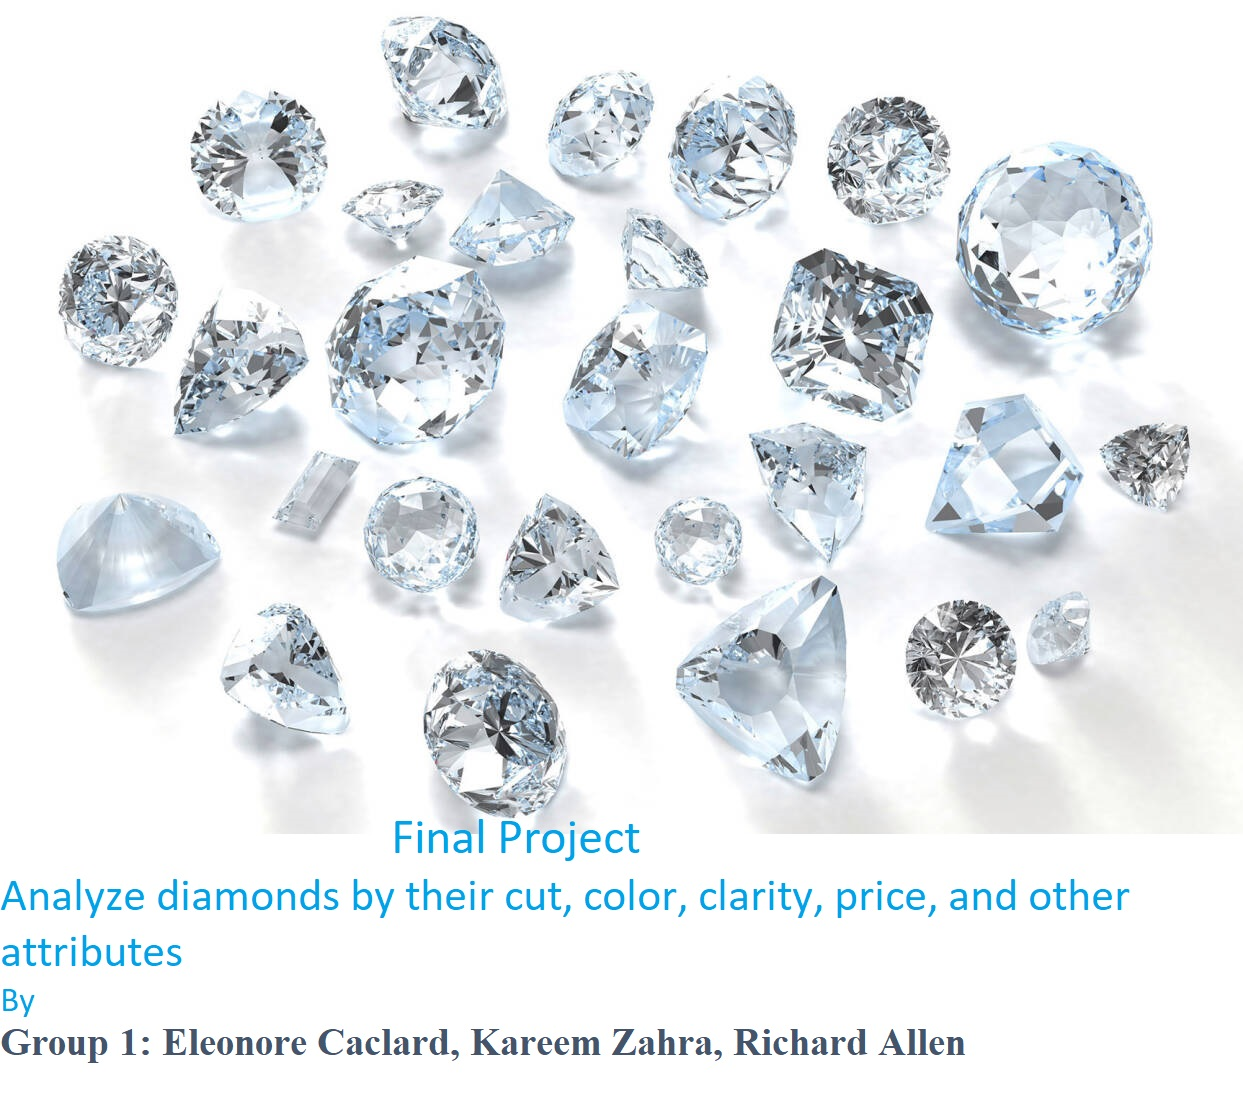

#  Data Collection

### Introduction

Data Dictionary


price

    price in US dollars (\$326--\$18,823)
carat

    weight of the diamond (0.2--5.01)
cut

    quality of the cut (Fair, Good, Very Good, Premium, Ideal)
color

    diamond colour, from D (best) to J (worst)
clarity

    a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x

    length in mm (0--10.74)
y

    width in mm (0--58.9)
z

    depth in mm (0--31.8)
depth

    total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
table

    width of top of diamond relative to widest point (43--95)


#### Importing All Libraries 

In [1]:
import pandas as pd
import pandas_profiling
import lux
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 10.0)
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score
from sklearn.metrics import mean_squared_error, r2_score
from scipy.cluster.hierarchy import linkage, dendrogram
np.set_printoptions(suppress=True, precision=5)
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans as KNeighborsClassifier
from sklearn.decomposition import KernelPCA, PCA             
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: No module named 'lux'

#### Read csv file into panda 

In [2]:
ds = pd.read_csv("diamonds.csv") # Diamonds is ds to be easily recalled.

####  Take a look at the data and the first few rows

In [3]:
ds.shape # Number of rows and columns. 

(53940, 10)

In [4]:
ds.head() # First 5 rows of the data.

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

#  Some Visualizations and Descriptive Statistics

In [5]:
ds.describe() # View some basic statistical details.

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [6]:
ds.describe(include='all') # More descriptive statistics.

carat    cut  color clarity         depth         table  \
count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13065           NaN           NaN   
mean        0.797940    NaN    NaN     NaN     61.749405     57.457184   
std         0.474011    NaN    NaN     NaN      1.432621      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price             x             y             z  
count   53940.000000  53940.000000  53940.000000  53940.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     3932.799722      5.731157      5.734526      3.538734  
std      3989.439738      1.121761      1.142135      0.705699  
min       326.000000      0.000000      0.000000      0.000000  
25%       950.000000      4.710000      4.720000      2.910000  
50%      2401.000000      5.700000      5.710000      3.530000  
75%      5324.250000      6.540000      6.540000      4.040000  
max     18823.000000     10.740000     58.900000     31.800000

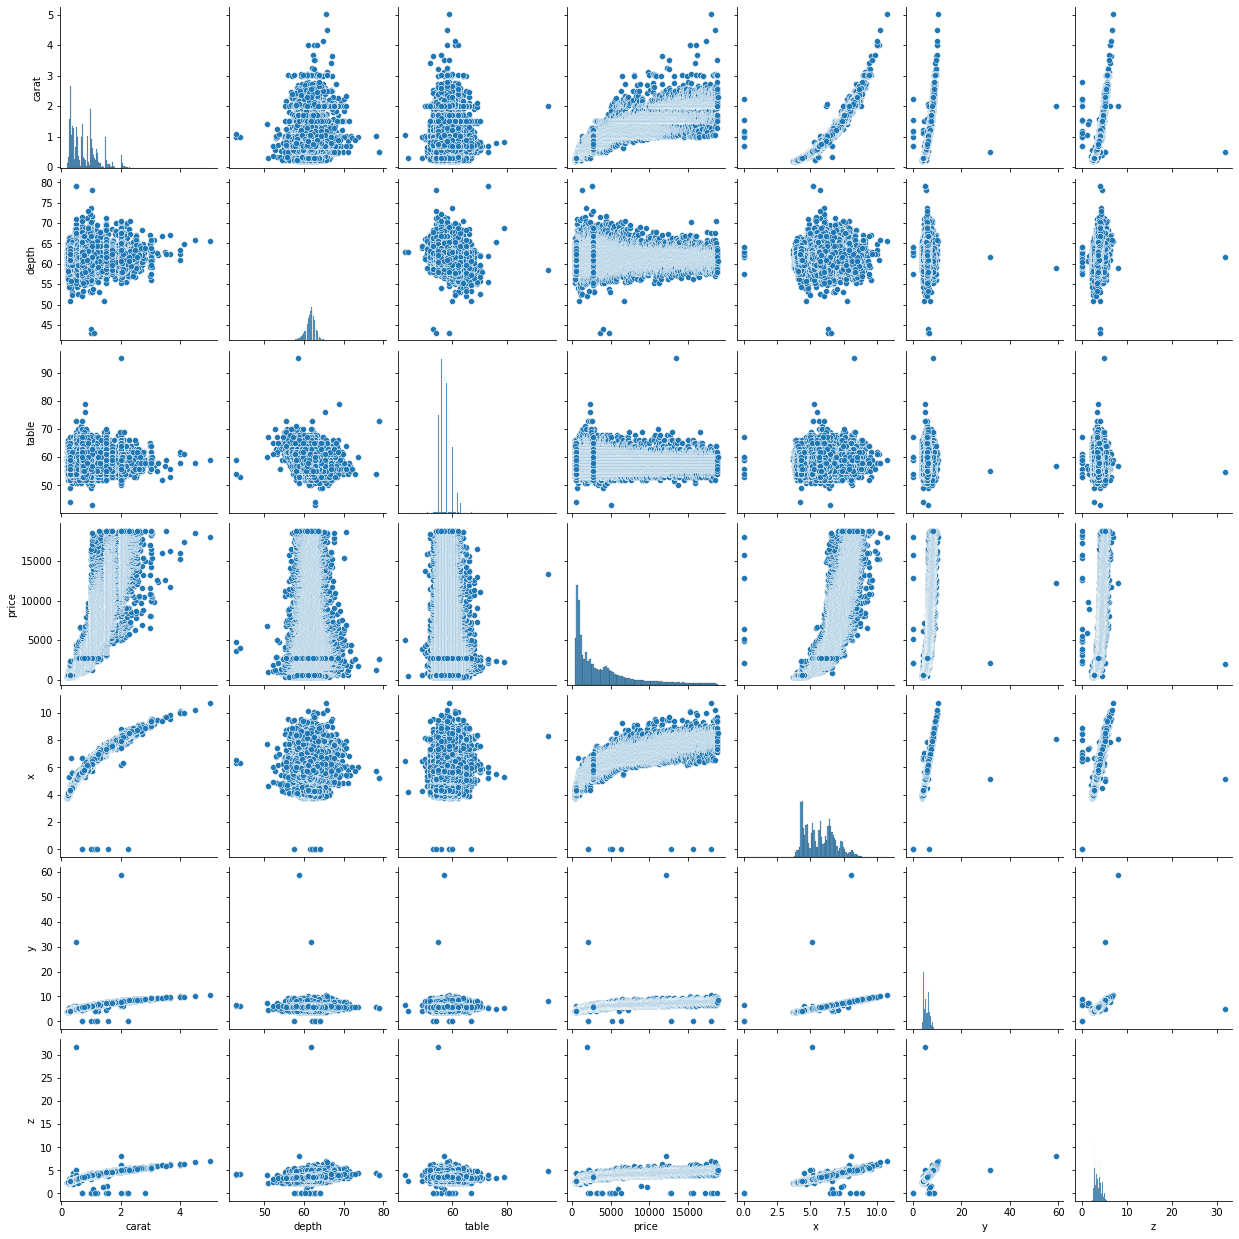

In [7]:
sns.pairplot(ds); # Scatter matrices to visualize every column of the data as a scatterplot.

#  Data cleanup (handling missing values, duplicates, errors, outliers)

###  More visualizations again for correlations, heatmaps:

#### Checking for any missing values or duplicates

In [8]:
ds.isnull().values.any() # Any null values?

False

In [9]:
ds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [21]:
ds.duplicated().any() # Any duplicated values?

True

In [22]:
ds.duplicated().sum()

145

#### Checking for any errors or outliers

In [12]:
ds.dtypes  # What is our data type?

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [13]:
ds.info() #  Information about the data including the index dtype and columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [14]:
ds.describe() # Looking for outliers.

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [15]:
ds.corr() # Which values in the columns move together?

carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000

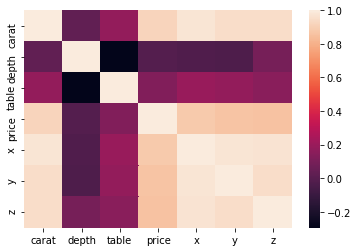

In [16]:
sns.heatmap(ds.corr()); # Visulazing the correlation on a heatmap.

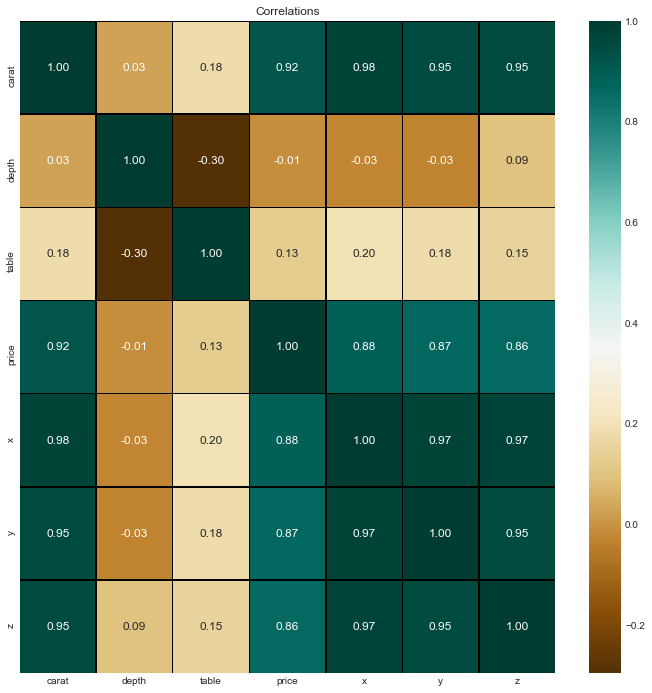

In [17]:
plt.style.use("seaborn-whitegrid")
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(ds.corr(), annot=True,annot_kws = {"size": 12},linecolor = "black", linewidths=0.5, fmt = '.2f', ax=ax,cmap = "BrBG")
plt.title("Correlations")
plt.show()

# More correlation on a heatmap.

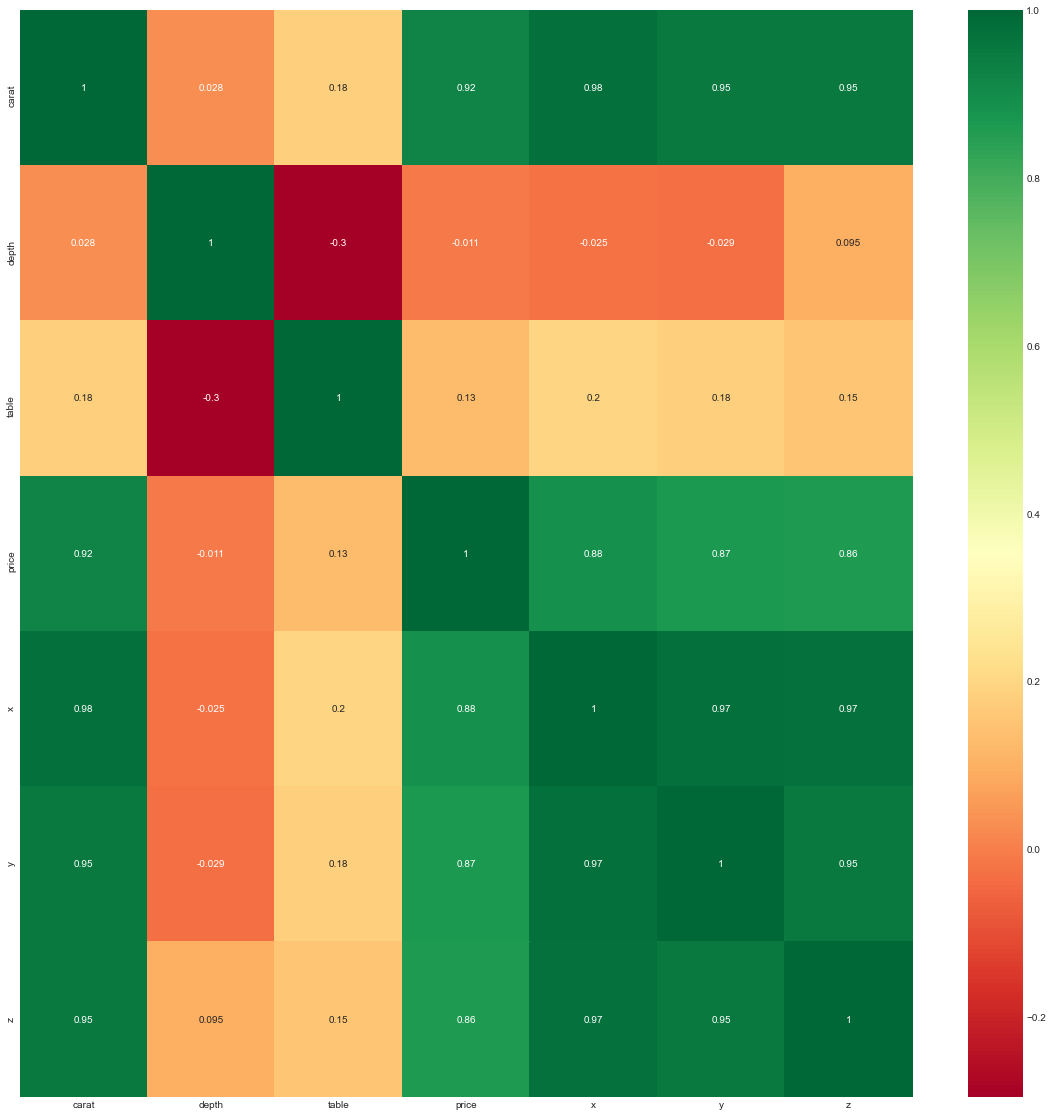

In [18]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ds.corr(), annot=True,cmap='RdYlGn')

# Feature creations/ Feature selection (Did we change or add new features or drop a any features)

##### Feature selection :
- Remove duplicated values.

- Dropping dimentionless diamonds.

- Dropping the outliers.

- Adding a column of the total vloume of each diamond

- Apply label encoder to each column with categorical data

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [3]:
ds1 = ds.drop_duplicates()

In [4]:
ds1

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53794 rows x 10 columns]

In [5]:
ds1 = ds.drop(ds1[ds1["x"]==0].index)
ds1 = ds.drop(ds1[ds1["y"]==0].index)
ds1 = ds.drop(ds1[ds1["z"]==0].index)

#Dropping dimentionless diamonds

In [6]:
ds1

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53921 rows x 10 columns]

In [7]:
ds1 = ds1[(ds1["depth"]<75)&(ds1["depth"]>45)]
ds1 = ds1[(ds1["table"]<80)&(ds1["table"]>40)]
ds1 = ds1[(ds1["x"]<30)]
ds1 = ds1[(ds1["y"]<30)]
ds1 = ds1[(ds1["z"]<30)&(ds1["z"]>2)]

#Dropping the outliers. 

In [8]:
ds1

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53907 rows x 10 columns]

In [9]:
ds1["volume"] = ds1["x"]*ds1["y"]*ds1["z"]
#Adding a column of the total vloume of each diamond

In [10]:
ds1

carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

           volume  
0       38.202030  
1       34.505856  
2       38.076885  
3       46.724580  
4       51.917250  
...           ...  
53935  115.920000  
53936  118.110175  
53937  114.449728  
53938  140.766120  
53939  124.568444  

[53907 rows x 11 columns]

Lable encoding the data to get rid of object dtype.

In [11]:
label_ds = ds.copy()
# Make copy to avoid changing original data 

In [12]:
label_ds = ds1.apply(LabelEncoder().fit_transform)
# Apply label encoder to each column with categorical data.

In [13]:
label_ds # Let's have a look....is it readable now?

carat  cut  color  clarity  depth  table  price    x    y    z  volume
0          3    2      1        3     81     30      0   19   25   20     150
1          1    3      1        2     64     90      0   13   11    8      15
2          3    1      1        4     35    115      1   29   34    8     135
3          9    3      5        5     90     60      2   44   50   40     996
4         11    1      6        3     99     60      3   58   62   52    2106
...      ...  ...    ...      ...    ...    ...    ...  ...  ...  ...     ...
53935     52    2      0        2     74     50   2300  199  203  127   11161
53936     52    1      0        2     97     30   2300  193  202  138   11678
53937     50    4      0        2     94     80   2300  190  195  133   10767
53938     66    3      4        3     76     60   2300  239  239  151   14022
53939     55    2      0        3     88     30   2300  207  214  141   12670

[53907 rows x 11 columns]

#  Data Visualization (IS the data ready to be modeled?)

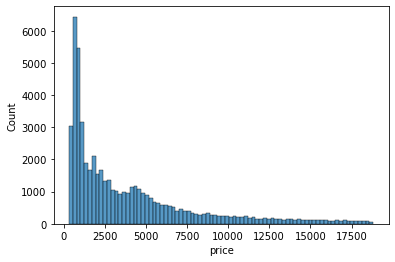

In [14]:
sns.histplot(ds1['price']);

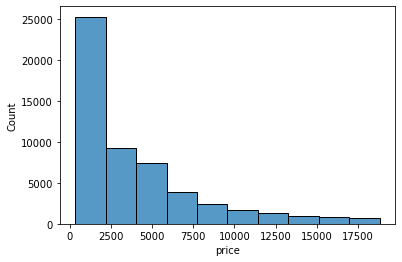

In [16]:
sns.histplot(ds1['price'], kde = False, bins = 10);

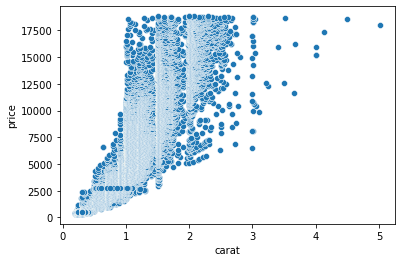

In [17]:
sns.scatterplot(data=ds1, x='carat', y='price');

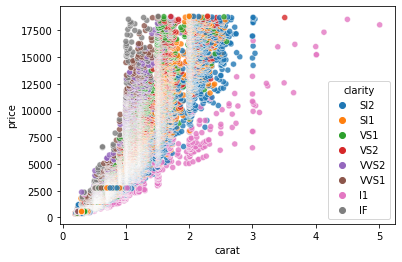

In [18]:
sns.scatterplot(data=ds1, x='carat', y='price', hue='clarity', alpha=0.8);  
# lowering alpha makes points block each other a little less

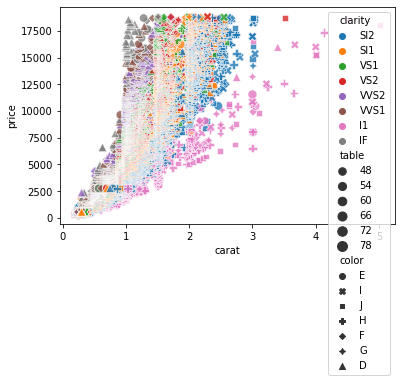

In [19]:
sns.scatterplot(data=ds1, x='carat', y='price', hue='clarity', size = 'table', style = 'color',
               sizes = (50, 100), alpha=0.8);  
# lowering alpha makes points block each other a little less

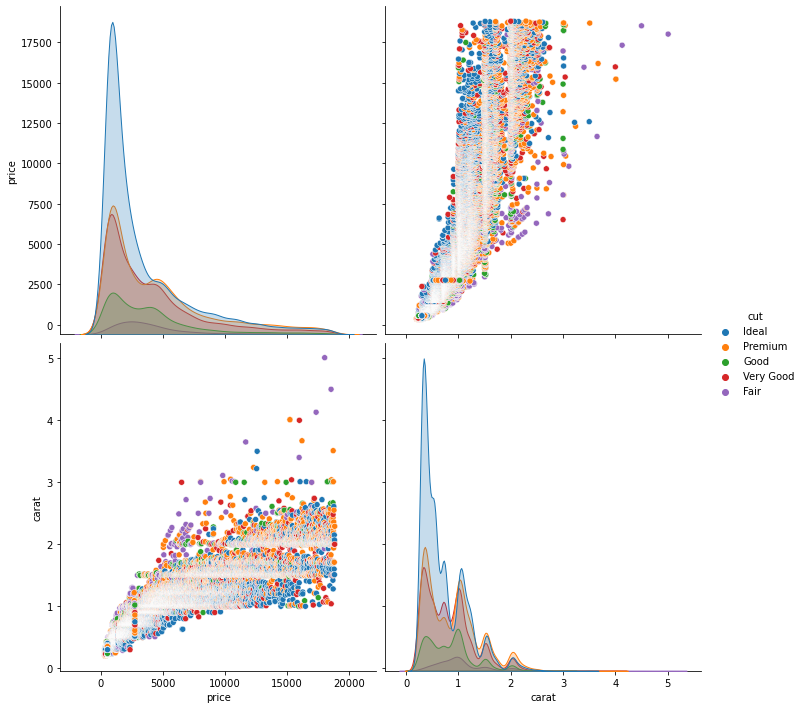

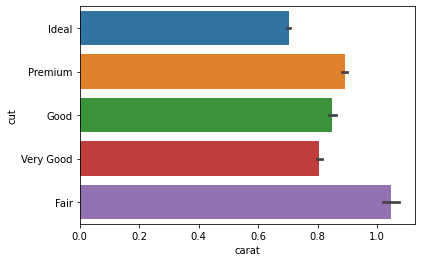

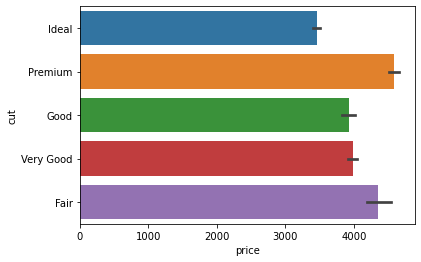

In [20]:
sns.pairplot(ds1[["price", "carat", "cut"]], hue = "cut", height = 5)
plt.show()
sns.barplot(x = "carat", y = "cut", data = ds1)
plt.show()
sns.barplot(x = "price", y = "cut", data = ds1)
plt.show()

### Visualize the relation between columns on a count plot


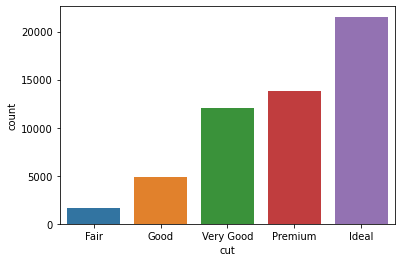

In [21]:
counts = ds1.groupby('cut')['price'].agg(len)
counts.name = 'count'
sns.barplot(y=counts, x=counts.index, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']);

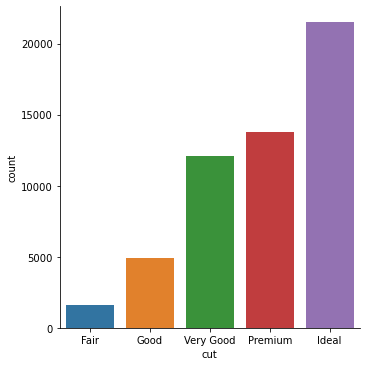

In [22]:
sns.catplot(data=ds1, x='cut', kind = 'count', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']);

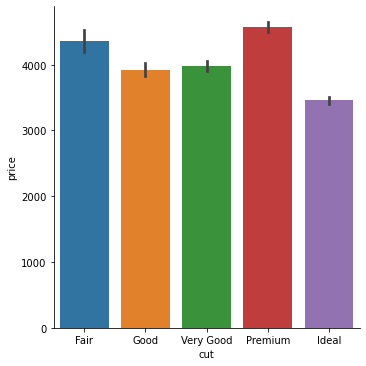

In [23]:
sns.catplot(data=ds1, x='cut', y='price', kind = 'bar' ,order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']);

C:\Users\Kareem.DESKTOP-ABP3L41\.conda\envs\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kareem.DESKTOP-ABP3L41\.conda\envs\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kareem.DESKTOP-ABP3L41\.conda\envs\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

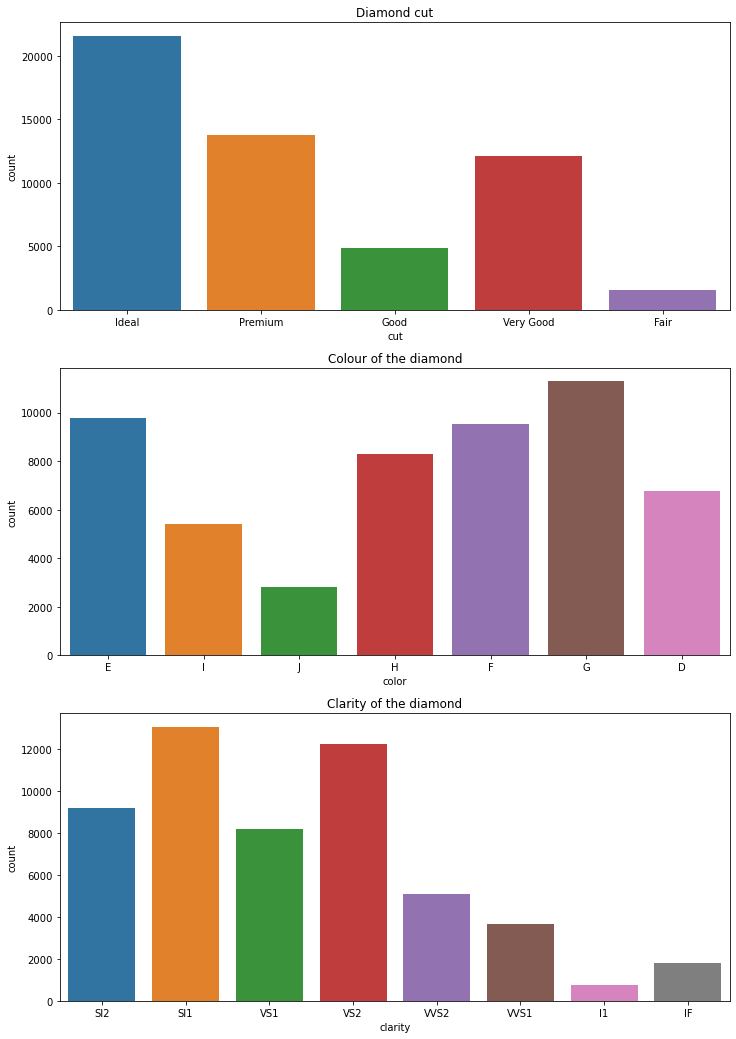

In [24]:
f, ax = plt.subplots(3, figsize=(12,18))
sns.countplot('cut', data=ds1, ax=ax[0])
sns.countplot('color', data=ds1, ax=ax[1])
sns.countplot('clarity', data=ds1, ax=ax[2])
ax[0].set_title('Diamond cut')
ax[1].set_title('Colour of the diamond')
ax[2].set_title('Clarity of the diamond');

In [25]:
pandas_profiling.ProfileReport(ds1)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#  All data in a single data frame

In [15]:
df = pd.DataFrame(label_ds) # Putting this all into a dataframe.

In [16]:
df

carat  cut  color  clarity  depth  table  price    x    y    z  volume
0          3    2      1        3     81     30      0   19   25   20     150
1          1    3      1        2     64     90      0   13   11    8      15
2          3    1      1        4     35    115      1   29   34    8     135
3          9    3      5        5     90     60      2   44   50   40     996
4         11    1      6        3     99     60      3   58   62   52    2106
...      ...  ...    ...      ...    ...    ...    ...  ...  ...  ...     ...
53935     52    2      0        2     74     50   2300  199  203  127   11161
53936     52    1      0        2     97     30   2300  193  202  138   11678
53937     50    4      0        2     94     80   2300  190  195  133   10767
53938     66    3      4        3     76     60   2300  239  239  151   14022
53939     55    2      0        3     88     30   2300  207  214  141   12670

[53907 rows x 11 columns]

#  Train/Test Split

In [28]:
X = df['carat']
y = df['price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape)
print(y_test.shape, y_train.shape)

(37734,) (16173,)
(16173,) (37734,)


In [30]:
X_train

29107     14
28020     10
23108     90
17285     83
31754     20
        ... 
33462     12
23266    132
9117      81
32925     22
16191     87
Name: carat, Length: 37734, dtype: int64

In [31]:
y_test

25718    10223
16889     5907
27190    11202
51838     1974
17218     6024
         ...  
50707     1846
19679     7051
21305     7799
11214     4376
39475      734
Name: price, Length: 16173, dtype: int64

In [32]:
X_test

25718     84
16889    100
27190    150
51838     58
17218    111
        ... 
50707     60
19679     86
21305     92
11214    103
39475     21
Name: carat, Length: 16173, dtype: int64

In [33]:
y_train

29107     344
28020     313
23108    8717
17285    6055
31754     427
         ... 
33462     483
23266    8798
9117     3974
32925     465
16191    5698
Name: price, Length: 37734, dtype: int64

#  Train the model using training data

In [34]:
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X_train,y_train)

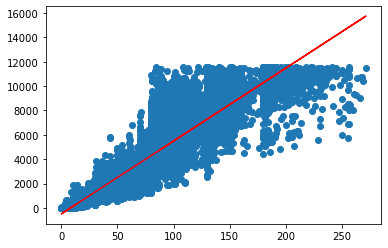

In [35]:
train_regr = intercept + slope * X_train

scatter(X_train,y_train)
plt.plot(X_train,train_regr, color='red');

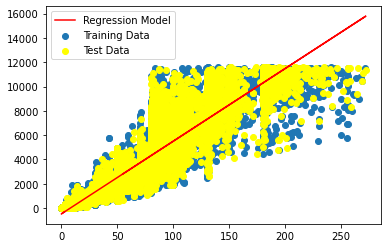

In [36]:
scatter(X_train,y_train,label='Training Data')
scatter(X_test,y_test,color='yellow',label='Test Data')
plt.plot(X,intercept + slope*X, color='red',label='Regression Model')
plt.legend();

### Linear Regression with Statsmodels

In [37]:
import statsmodels.formula.api as smf  # import the formula tools

model = smf.ols(data = df, formula = "y ~ X")  # create the linear regression model object. 
                                               # "ols" stands for ordinary least squares.
result = model.fit()  # create a RegressionResults object

In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 1.175e+06
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:37:40   Log-Likelihood:            -2.4610e+05
No. Observations:               53907   AIC:                         4.922e+05
Df Residuals:                   53905   BIC:                         4.922e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.8690      0.162    389.141      0.000      62.552      63.186
X              2.3011      0.002   1084.109      0.000       2.297       2.305
==============================================================================
Omnibus:                    11434.014   Durbin-Watson:                   0.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33514.325
Skew:                          -1.110   Prob(JB):                         0.00
Kurtosis:                       6.161   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Applying Logistic Regression

In [39]:
X = df['carat'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)
print(X_test.shape)

(37734, 1)
(16173, 1)
(37734, 1)
(16173, 1)


In [41]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X, y)

In [42]:
clf = LogisticRegression(solver='liblinear')

In [43]:
df_model = linear_model.LogisticRegression(solver='lbfgs', max_iter=1)
df_model.fit(X, y)

C:\Users\Kareem.DESKTOP-ABP3L41\.conda\envs\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Kareem.DESKTOP-ABP3L41\.conda\envs\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1)

### Logistic Regression with Multiple Features

In [44]:
X2 = df[['carat', 'price']]

df_log_model_2 = linear_model.LogisticRegression(solver='lbfgs', max_iter=1)
df_log_model_2.fit(X2,y)

C:\Users\Kareem.DESKTOP-ABP3L41\.conda\envs\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Kareem.DESKTOP-ABP3L41\.conda\envs\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1)

In [45]:
cut_coef = df_log_model_2.coef_[0][0]
cut_coef

-8.138992163920483e-07

In [46]:
carat_coef = df_log_model_2.coef_[0][1]
carat_coef

-4.2689160032871406e-05

In [47]:
df_intercept = df_log_model_2.intercept_[0]
df_intercept

-7.878491783669068e-09

### Decision Trees 

In [48]:
df_tree = tree.DecisionTreeClassifier()
df_tree.fit(X,y)

DecisionTreeClassifier()

In [49]:
df_tree.score(X,y)

0.03470792290426104

### Random Forests

In [50]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

<ipython-input-50-2a968e16886f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor()

In [51]:
root_mean_squared_error = np.sqrt(mean_squared_error(y, rf.predict(X)))
root_mean_squared_error

923.1250807328523

In [54]:
for feature in zip(X.columns, rf.feature_importances):
    print(feature)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

###### 'carat' and 'y' are the most important features in predicting target

We run the linear regression for comparison with random forest:


In [55]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)

In [56]:
pred_rf = rf.predict(X_test)

In [57]:
lr_mse = mean_squared_error(y_test,pred_lr)
rf_mse = mean_squared_error(y_test,pred_rf)
print(lr_mse)
print(rf_mse)

1031780.4842963031
857687.6332814015


In [58]:
print(r2_score(y_test,pred_lr))
print(r2_score(y_test,pred_rf))

0.8872317860370375
0.9062592246942632


# K-mean Clustering

In [60]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 2)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=2)

In [62]:
centers = kmeans.cluster_centers_
print(centers)

[[ 85.12271]
 [ 14.41211]
 [132.11881]
 [191.34426]
 [ 43.30836]]


In [63]:
diamond_clusters = kmeans.fit_predict(X)
diamond_clusters

array([1, 1, 1, ..., 4, 0, 4])

In [64]:
plt.scatter(diamond_clusters['price'], diamond_clusters['carat'], cmap = 'rainbow')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [65]:
diamond_1 = KMeans.lables_
fig, axes = plt.subplot(1, 2, figsize = (10, 5))
axes[0].scatter(X[:,0], X[:,1], c = y, cmap = 'gist_rainbow', edgecolor = 'k', s = 150)
axes[1].scatter(X[:,0], X[:,1], c = diamond_1, cmap = 'jet', edgecolor = 'k', s = 150)
axes[0].set_xlabel('carat')
axes[0].set_ylabel('price')
axes[0].set_title('Original')
axes[1].set_xlabel('carat')
axes[1].set_ylabel('price')
axes[1].set_title('Predicted Kmeans')

AttributeError: type object 'KMeans' has no attribute 'lables_'

# SVM

In [66]:
plt.xlabel('carat')
plt.ylabel('price')
plt.scatter(df['carat'], df['carat'],color="green",marker='+', linewidth='5')
plt.scatter(df['price'], df['price'],color="blue",marker='.' , linewidth='5');

TypeError: must be real number, not str

<Figure size 432x288 with 1 Axes>

In [ ]:
svmclassifier = SVC(kernel = 'linear', random_state = 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2)
svmclassifier.fit(X_train, y_train)
svmclassifier.predict(X_test)
svmclassifier.score(X_test, y_test)

C:\Users\Kareem.DESKTOP-ABP3L41\.conda\envs\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [35]:
svmclassifier = SVC(kernel = 'rbf', random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
len(X_train)
len(y_train)
X_train = X_test.iloc[:,0:2].values
y_train = X_test.iloc[:,2].values
X_test = X_test.iloc[:,0:2].values
y_test = X_test.iloc[:,2].values
svmclassifier.fit(X_train, y_train)
svmclassifier.predict(X_train, y_train)
svmclassifier.score(X_train, y_train)

NameError: name 'X' is not defined

#### Cross Validation

In [64]:
cross_val_scores = cross_val_score(RandomForestRegressor(max_depth=1, n_estimators=100, random_state=1),\
                                   X, y, scoring='neg_mean_squared_error', cv=5)

In [65]:
cross_val_scores = np.sqrt(np.abs(cross_val_scores)) 
print(cross_val_scores)
print("mean:", np.mean(cross_val_scores))

[2744.54938 3451.65454 3532.1258   915.57314  746.65766]
mean: 2278.1121038086612


In [66]:
!jupyter nbconvert Final_Project.ipynb --to 'html'

C:\Users\Kareem.DESKTOP-ABP3L41\.conda\envs\python38\lib\site-packages\traitlets\traitlets.py:2196: FutureWarning: Supporting extra quotes around Unicode is deprecated in traitlets 5.0. Use 'html' instead of "'html'" – or use CUnicode.
  warn(
[NbConvertApp] Converting notebook Final_Project.ipynb to html
[NbConvertApp] Writing 8369918 bytes to Final_Project.html
